In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [0]:
# Reading/Importing the dataset into work environment 
df= pd.read_csv("/content/drive/My Drive/capstone/online_shoppers_intention.csv")
df.head()

Administrative  Administrative_Duration  ...  Weekend  Revenue
0               0                      0.0  ...    False    False
1               0                      0.0  ...    False    False
2               0                      0.0  ...    False    False
3               0                      0.0  ...    False    False
4               0                      0.0  ...     True    False

[5 rows x 18 columns]

In [0]:
# Converting datatype of categorical variable

In [0]:
df['Month']=df['Month'].astype('category')
df['OperatingSystems']=df['OperatingSystems'].astype('category')
df['Browser']=df['Browser'].astype('category')
df['Region']=df['Region'].astype('category')
df['TrafficType']=df['TrafficType'].astype('category')
df['VisitorType']=df['VisitorType'].astype('category')

In [0]:
df['Weekend']=df['Weekend'].astype('bool')
df['Revenue']=df['Revenue'].astype('bool')

In [0]:
# Creating seperate dataframe of numerical & categorical variable
df_num=df.select_dtypes(include=['int64','float64'])
df_catg=df.select_dtypes(include=['category'])
df_bool=df.select_dtypes(include=['bool'])

In [0]:
df_bool.head()

Weekend  Revenue
0    False    False
1    False    False
2    False    False
3    False    False
4     True    False

In [0]:
df_num.head()

Administrative  Administrative_Duration  ...  PageValues  SpecialDay
0               0                      0.0  ...         0.0         0.0
1               0                      0.0  ...         0.0         0.0
2               0                      0.0  ...         0.0         0.0
3               0                      0.0  ...         0.0         0.0
4               0                      0.0  ...         0.0         0.0

[5 rows x 10 columns]

In [0]:
df_catg.head()

Month OperatingSystems Browser Region TrafficType        VisitorType
0   Feb                1       1      1           1  Returning_Visitor
1   Feb                2       2      1           2  Returning_Visitor
2   Feb                4       1      9           3  Returning_Visitor
3   Feb                3       2      2           4  Returning_Visitor
4   Feb                3       3      1           4  Returning_Visitor

In [0]:
# Standard scaling of data 

In [0]:
ss=StandardScaler()
num_ss=ss.fit_transform(df_num)

In [0]:
df_num_ss=pd.DataFrame(data=num_ss,columns=df_num.columns)

In [0]:
df_num_ss.head()

Administrative  Administrative_Duration  ...  PageValues  SpecialDay
0       -0.696993                -0.457191  ...   -0.317178   -0.308821
1       -0.696993                -0.457191  ...   -0.317178   -0.308821
2       -0.696993                -0.457191  ...   -0.317178   -0.308821
3       -0.696993                -0.457191  ...   -0.317178   -0.308821
4       -0.696993                -0.457191  ...   -0.317178   -0.308821

[5 rows x 10 columns]

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [0]:
df_catg_dummy=df_catg.apply(le.fit_transform)
df_catg_dummy.head()

Month  OperatingSystems  Browser  Region  TrafficType  VisitorType
0      2                 0        0       0            0            2
1      2                 1        1       0            1            2
2      2                 3        0       8            2            2
3      2                 2        1       1            3            2
4      2                 2        2       0            3            2

In [0]:
df_bool["Weekend"]=df_bool["Weekend"].map({False:0,True:1})
df_bool["Revenue"]=df_bool["Revenue"].map({False:0,True:1})

In [0]:
df_bool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 2 columns):
Weekend    12330 non-null int64
Revenue    12330 non-null int64
dtypes: int64(2)
memory usage: 192.7 KB


In [0]:
df_ss=pd.concat([df_num_ss,df_catg_dummy],axis=1)
df_ss=pd.concat([df_ss,df_bool],axis=1)
df_ss.head()

Administrative  Administrative_Duration  ...  Weekend  Revenue
0       -0.696993                -0.457191  ...        0        0
1       -0.696993                -0.457191  ...        0        0
2       -0.696993                -0.457191  ...        0        0
3       -0.696993                -0.457191  ...        0        0
4       -0.696993                -0.457191  ...        1        0

[5 rows x 18 columns]

In [0]:
# Seperating Independent and Target Variable ( standardized data)
X=df_ss.drop('Revenue',axis=1)
y=df_ss['Revenue']

In [0]:
# Before oversampling , Target Variable is highly imbalanced 
np.bincount(y)

array([10422,  1908])

In [0]:
# Oversampling of Data to avoid Class imbalance ( USING SMOTE)

In [0]:
smt = SMOTE()
X_sm, y_sm = smt.fit_sample(X,y)
np.bincount(y_sm)

array([10422, 10422])

#Model building

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,train_size=0.7,random_state=100)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
lr= LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
LR_y_pred = lr.predict(X_test)

lr_test_accuracy=metrics.accuracy_score(y_test,LR_y_pred)
lr_train_accuracy=lr.score(X_train, y_train)
lr_test_precision = metrics.precision_score(y_test,LR_y_pred)

print("Test Accuracy for Logistic Regression:\t",lr_test_accuracy)
print()
print("Training Accuracy for Logistic Regression:\t",lr_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,LR_y_pred))
print()
print("\nPrecision Score:\n\n",lr_test_precision)

Test Accuracy for Logistic Regression:	 0.8365845858650464

Training Accuracy for Logistic Regression:	 0.8385195339273475

Confusion Matirx:

 [[2820  359]
 [ 663 2412]]


Precision Score:

 0.8704438830747022


In [0]:
Report_lr=metrics.classification_report(y_test,LR_y_pred)
print(Report_lr)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3179
           1       0.87      0.78      0.83      3075

    accuracy                           0.84      6254
   macro avg       0.84      0.84      0.84      6254
weighted avg       0.84      0.84      0.84      6254



In [0]:
from sklearn import metrics
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(6,6))
    plt.plot(fpr,tpr,label='ROC curve(area = %0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positve rate')
    plt.ylabel('True positve rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr,tpr,thresholds

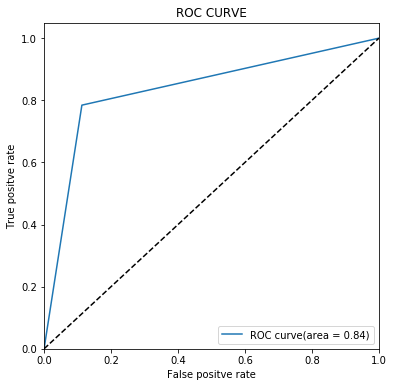

(array([0.        , 0.11292859, 1.        ]),
 array([0.        , 0.78439024, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,LR_y_pred)

In [0]:
odd_ratio=pd.DataFrame(data=np.exp(lr.coef_ ),columns=X.columns).T

In [0]:
odd_ratio

0
Administrative            1.056337
Administrative_Duration   0.879014
Informational             1.066136
Informational_Duration    0.985222
ProductRelated            1.336972
ProductRelated_Duration   1.113917
BounceRates               0.833093
ExitRates                 0.554018
PageValues               12.511454
SpecialDay                0.753146
Month                     1.135388
OperatingSystems          0.913766
Browser                   0.979719
Region                    0.977019
TrafficType               0.999794
VisitorType               0.838279
Weekend                   1.106267

In [0]:
Co_efficient=pd.DataFrame(data=lr.coef_,columns=X.columns).T

In [0]:
Co_efficient

0
Administrative           0.054807
Administrative_Duration -0.128955
Informational            0.064041
Informational_Duration  -0.014889
ProductRelated           0.290407
ProductRelated_Duration  0.107883
BounceRates             -0.182610
ExitRates               -0.590558
PageValues               2.526645
SpecialDay              -0.283496
Month                    0.126975
OperatingSystems        -0.090181
Browser                 -0.020489
Region                  -0.023249
TrafficType             -0.000206
VisitorType             -0.176404
Weekend                  0.100991

In [0]:
# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
DT= DecisionTreeClassifier(random_state=0,max_depth=3)  
DT.fit(X_train, y_train)

DT_y_pred = DT.predict(X_test) 
DT_test_accuracy=metrics.accuracy_score(y_test,DT_y_pred)
DT_train_accuracy=DT.score(X_train, y_train)
DT_test_precision = metrics.precision_score(y_test,DT_y_pred)


print("Test Accuracy for Decision Tree model:\n",DT_test_accuracy)
print()
print("Training Accuracy for Decision Tree model:\n",DT_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,DT_y_pred))
print()
print("\nPrecision Score:\n\n",DT_test_precision)

Test Accuracy for Decision Tree model:
 0.8837543971858011

Training Accuracy for Decision Tree model:
 0.8868403015764222

Confusion Matirx:

 [[2800  379]
 [ 348 2727]]


Precision Score:

 0.8779781068898905


In [0]:
Report_DT=metrics.classification_report(y_test,DT_y_pred)
print(Report_DT)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3179
           1       0.89      0.92      0.90      3075

    accuracy                           0.90      6254
   macro avg       0.90      0.90      0.90      6254
weighted avg       0.90      0.90      0.90      6254



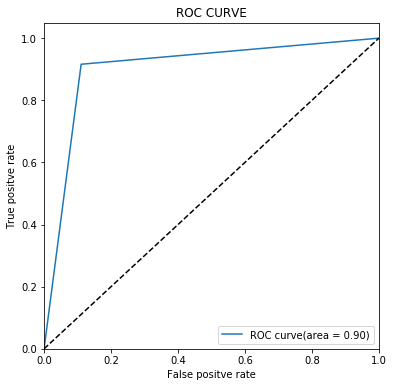

(array([0.        , 0.11072664, 1.        ]),
 array([0.        , 0.91609756, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,DT_y_pred)

In [0]:
X_train=pd.DataFrame(X_train)

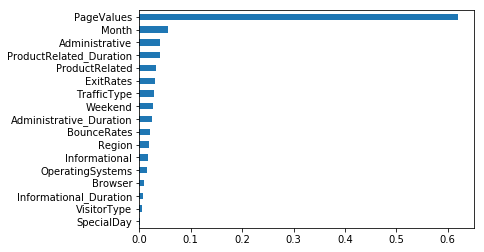

In [0]:
(pd.Series(DT.feature_importances_, index=X.columns).sort_values().plot(kind='barh'))
plt.show()

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [0]:
features = list(df.columns[1:])

In [0]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(DT, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.584613 to fit



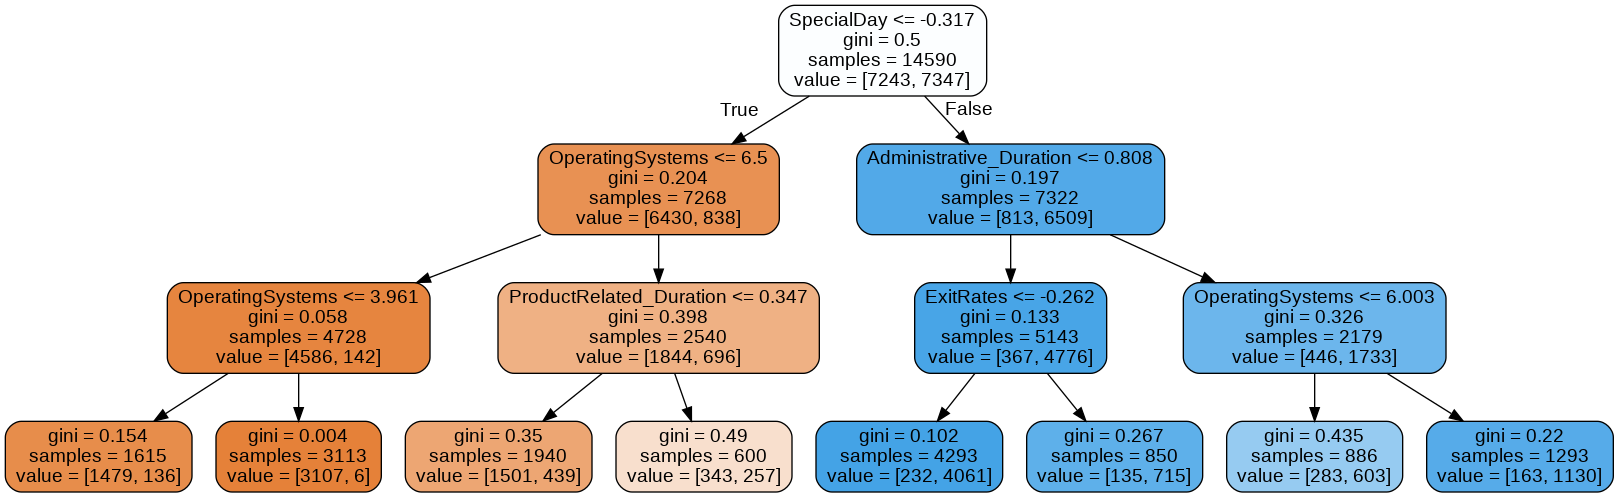

In [0]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(DT, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
# Random forest model

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfc= RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

rfc_y_pred = rfc.predict(X_test) 
rfc_test_accuracy=metrics.accuracy_score(y_test,rfc_y_pred)
rfc_train_accuracy=rfc.score(X_train, y_train)
rfc_test_precision = metrics.precision_score(y_test,rfc_y_pred)

print("Test Accuracy for Random forest model:\n",rfc_test_accuracy)
print()
print("Training Accuracy forRandom forest model:\n",rfc_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,rfc_y_pred))
print()
print("\nPrecision Score:\n\n",rfc_test_precision)

Test Accuracy for Random forest model:
 0.9304445155100736

Training Accuracy forRandom forest model:
 0.9963673749143249

Confusion Matirx:

 [[2945  234]
 [ 201 2874]]


Precision Score:

 0.9247104247104247


In [0]:
Report_rfc=metrics.classification_report(y_test,rfc_y_pred)
print(Report_rfc)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3179
           1       0.92      0.93      0.93      3075

    accuracy                           0.93      6254
   macro avg       0.93      0.93      0.93      6254
weighted avg       0.93      0.93      0.93      6254



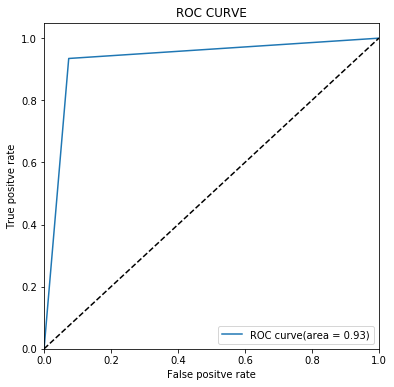

(array([0.        , 0.07360805, 1.        ]),
 array([0.        , 0.93463415, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,rfc_y_pred)

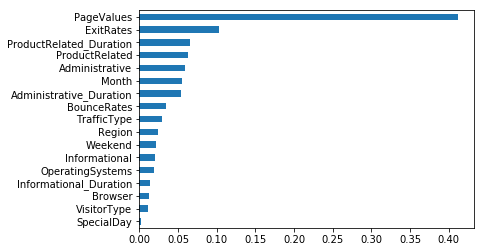

In [0]:
(pd.Series(rfc.feature_importances_, index=X.columns).sort_values().plot(kind='barh'))
plt.show()

In [0]:
# Light Gradient Boosting

In [0]:
from lightgbm import LGBMClassifier

In [0]:
lgbm= LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)

lgbm_y_pred = lgbm.predict(X_test) 
lgbm_test_accuracy=metrics.accuracy_score(y_test,lgbm_y_pred)
lgbm_train_accuracy=lgbm.score(X_train, y_train)
lgbm_test_precision = metrics.precision_score(y_test,lgbm_y_pred)

print("Test Accuracy for Light Gradient boosting model:\n",lgbm_test_accuracy)
print()
print("Training Accuracy forLight Gradient boosting model:\n",lgbm_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,lgbm_y_pred))
print()
print("\nPrecision Score:\n\n",lgbm_test_precision)

Test Accuracy for Light Gradient boosting model:
 0.9363607291333547

Training Accuracy forLight Gradient boosting model:
 0.9707333790267306

Confusion Matirx:

 [[2970  209]
 [ 189 2886]]


Precision Score:

 0.9324717285945072


In [0]:
Report_lgbm=metrics.classification_report(y_test,lgbm_y_pred)
print(Report_lgbm)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3179
           1       0.93      0.94      0.94      3075

    accuracy                           0.94      6254
   macro avg       0.94      0.94      0.94      6254
weighted avg       0.94      0.94      0.94      6254



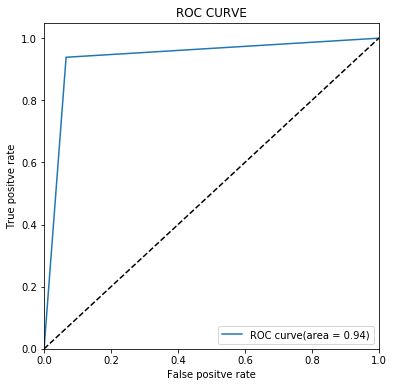

(array([0.        , 0.06574394, 1.        ]),
 array([0.        , 0.93853659, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,lgbm_y_pred)

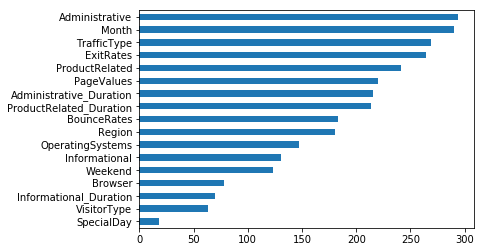

In [0]:
(pd.Series(lgbm.feature_importances_, index=X.columns).sort_values().plot(kind='barh'))
plt.show()

In [0]:
# Checking accuracy

In [0]:
accuracy_table=pd.DataFrame(columns=['Train_accuracy','Test_accuracy','Test_Precision'],index=['LR','DT','RF','LGBM','Bag_LR','Bag_DT','Boost_LR','Boost_DT'])

In [0]:
accuracy_table['Train_accuracy']=[lr_train_accuracy,DT_train_accuracy,rfc_train_accuracy,lgbm_train_accuracy,bag_lr_train_accuracy,bag_DT_train_accuracy,boost_lr_train_accuracy,boost_DT_train_accuracy]

In [0]:
accuracy_table['Test_accuracy']=[lr_test_accuracy,DT_test_accuracy,rfc_test_accuracy,lgbm_test_accuracy,bag_lr_test_accuracy,bag_DT_test_accuracy,boost_lr_test_accuracy,boost_DT_test_accuracy]

In [0]:
accuracy_table['Test_Precision']=[lr_test_precision,DT_test_precision,rfc_test_precision,lgbm_test_precision,bag_lr_test_precision,bag_DT_test_precision,boost_lr_test_precision,boost_DT_test_precision]

In [0]:
accuracy_table.sort_values(by="Test_Precision",ascending=False)

Train_accuracy  Test_accuracy  Test_Precision
LGBM            0.999863       0.934602        0.927244
RF              0.996779       0.933802        0.924944
Bag_DT          0.836395       0.934762        0.916069
Boost_DT        0.791912       0.907419        0.896947
DT              1.000000       0.905980        0.894887
LR              0.838245       0.839623        0.876727
Bag_LR          0.836395       0.836585        0.870979
Boost_LR        0.791912       0.792293        0.806207

In [0]:
# BASE MODEL 

lr= LogisticRegression(random_state=0)
DT= DecisionTreeClassifier(random_state=0)  
rfc= RandomForestClassifier(random_state=0)
lgbm= LGBMClassifier(random_state=0)

In [0]:
# BAGGED MODEL 
from sklearn.ensemble import BaggingClassifier

bag_lr= BaggingClassifier(base_estimator=lr,random_state=0,)
bag_DT= BaggingClassifier(base_estimator=DT,random_state=0)


In [0]:
# Finding n-estimator for all bagged model
from sklearn.model_selection import GridSearchCV,KFold

grid = {'n_estimators': np.arange(1,50,5)}
kf=KFold(n_splits=5,shuffle=True,random_state=0)
BC_grid = GridSearchCV(bag_DT, grid, cv=kf,scoring='roc_auc',n_jobs=-1)
BC_grid.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_s

In [0]:
print("Best params : {}".format(BC_grid.best_params_)) 
print("Best score: {}".format(BC_grid.best_score_))

Best params : {'n_estimators': 46}
Best score: 0.9771563947864276


In [0]:
# BAGGED MODEL after tuning
bag_lr= BaggingClassifier(base_estimator=lr,random_state=0,n_estimators=1)
bag_DT= BaggingClassifier(base_estimator=DT,random_state=0,n_estimators=46)

In [0]:
# BAGGED MODEL 
from sklearn.ensemble import AdaBoostClassifier

boost_lr= AdaBoostClassifier(base_estimator=lr,random_state=0)
boost_DT= AdaBoostClassifier(base_estimator=DT,random_state=0)  


In [0]:
# Finding n-estimator for all boost model
from sklearn.model_selection import GridSearchCV,KFold

grid = {'n_estimators': np.arange(1,50,5)}
kf=KFold(n_splits=5,shuffle=True,random_state=0)
BC_grid = GridSearchCV(boost_DT, grid, cv=kf,scoring='roc_auc',n_jobs=-1)
BC_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                     

In [0]:
print("Best params : {}".format(BC_grid.best_params_)) 
print("Best score: {}".format(BC_grid.best_score_))

Best params : {'n_estimators': 1}
Best score: 0.8912214699577113


In [0]:
boost_lr= AdaBoostClassifier(base_estimator=lr,random_state=0,n_estimators=6)
boost_DT= AdaBoostClassifier(base_estimator=DT,random_state=0,n_estimators=1)  

In [0]:
# All model

# Base Model

lr= LogisticRegression(random_state=0)  
DT= DecisionTreeClassifier(random_state=0)  
rfc= RandomForestClassifier(random_state=0)
lgbm= LGBMClassifier(random_state=0)

# Bagged Model after tuning
bag_lr= BaggingClassifier(base_estimator=lr,random_state=0,n_estimators=1)  
bag_DT= BaggingClassifier(base_estimator=DT,random_state=0,n_estimators=46)

# Boosted Model after tuning
boost_lr= AdaBoostClassifier(base_estimator=lr,random_state=0,n_estimators=6)
boost_DT= AdaBoostClassifier(base_estimator=DT,random_state=0,n_estimators=1)  


# Bagged LR Model





In [0]:
bag_lr= BaggingClassifier(base_estimator=lr,random_state=0,n_estimators=1)  
bag_lr.fit(X_train, y_train)

bag_lr_y_pred = bag_lr.predict(X_test) 
bag_lr_test_accuracy=metrics.accuracy_score(y_test,bag_lr_y_pred)
bag_lr_train_accuracy=bag_lr.score(X_train, y_train)
bag_lr_test_precision = metrics.precision_score(y_test,bag_lr_y_pred)

print("Test Accuracy for Bagged LR model:\n",bag_lr_test_accuracy)
print()
print("Training Accuracy for Bagged LR model model:\n",bag_lr_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,bag_lr_y_pred))
print()
print("\nPrecision Score:\n\n",bag_lr_test_precision)

Test Accuracy for Bagged LR model:
 0.8365845858650464

Training Accuracy for Bagged LR model model:
 0.8363947909527073

Confusion Matirx:

 [[2822  357]
 [ 665 2410]]


Precision Score:

 0.8709794000722805


In [0]:
Report_bag_lr=metrics.classification_report(y_test,bag_lr_y_pred)
print(Report_bag_lr)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3179
           1       0.87      0.78      0.83      3075

    accuracy                           0.84      6254
   macro avg       0.84      0.84      0.84      6254
weighted avg       0.84      0.84      0.84      6254



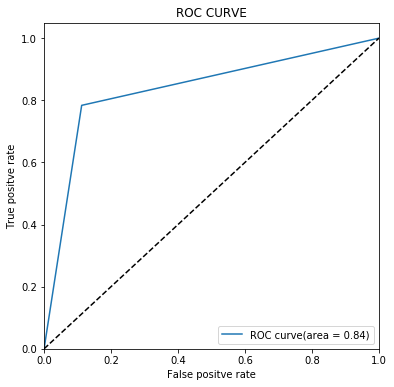

(array([0.        , 0.11229947, 1.        ]),
 array([0.        , 0.78373984, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,bag_lr_y_pred)

# Bagged DT

In [0]:
bag_DT= BaggingClassifier(base_estimator=DT,random_state=0,n_estimators=46)
bag_DT.fit(X_train, y_train)

bag_DT_y_pred = bag_DT.predict(X_test) 
bag_DT_test_accuracy=metrics.accuracy_score(y_test,bag_DT_y_pred)
bag_DT_train_accuracy=bag_lr.score(X_train, y_train)
bag_DT_test_precision = metrics.precision_score(y_test,bag_DT_y_pred)

print("Test Accuracy for Bagged DT model:\n",bag_DT_test_accuracy)
print()
print("Training Accuracy for Bagged DT model model:\n",bag_DT_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,bag_DT_y_pred))
print()
print("\nPrecision Score:\n\n",bag_DT_test_precision)

Test Accuracy for Bagged DT model:
 0.9347617524784139

Training Accuracy for Bagged DT model model:
 0.8363947909527073

Confusion Matirx:

 [[2910  269]
 [ 139 2936]]


Precision Score:

 0.9160686427457099


In [0]:
Report_bag_DT=metrics.classification_report(y_test,bag_DT_y_pred)
print(Report_bag_DT)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3179
           1       0.92      0.95      0.94      3075

    accuracy                           0.93      6254
   macro avg       0.94      0.94      0.93      6254
weighted avg       0.94      0.93      0.93      6254



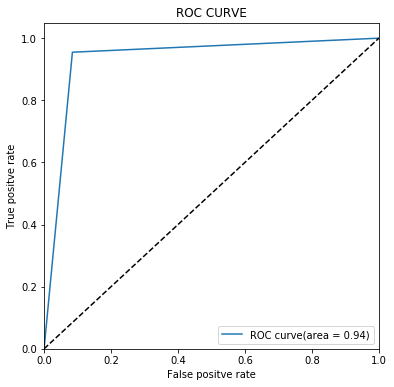

(array([0.       , 0.0846178, 1.       ]),
 array([0.        , 0.95479675, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,bag_DT_y_pred)

# Boosted LR

In [0]:
boost_lr= AdaBoostClassifier(base_estimator=lr,random_state=0,n_estimators=6)
boost_lr.fit(X_train, y_train)

boost_lr_y_pred = boost_lr.predict(X_test) 
boost_lr_test_accuracy=metrics.accuracy_score(y_test,boost_lr_y_pred)
boost_lr_train_accuracy=boost_lr.score(X_train, y_train)
boost_lr_test_precision = metrics.precision_score(y_test,boost_lr_y_pred)

print("Test Accuracy for Boosted LR model:\n",boost_lr_test_accuracy)
print()
print("Training Accuracy for Boosted LR model model:\n",boost_lr_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,boost_lr_y_pred))
print()
print("\nPrecision Score:\n\n",boost_lr_test_precision)



Test Accuracy for Boosted LR model:
 0.7922929325231851

Training Accuracy for Boosted LR model model:
 0.7919122686771761

Confusion Matirx:

 [[2617  562]
 [ 737 2338]]


Precision Score:

 0.8062068965517242


In [0]:
Report_boost_lr=metrics.classification_report(y_test,boost_lr_y_pred)
print(Report_boost_lr)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      3179
           1       0.81      0.76      0.78      3075

    accuracy                           0.79      6254
   macro avg       0.79      0.79      0.79      6254
weighted avg       0.79      0.79      0.79      6254



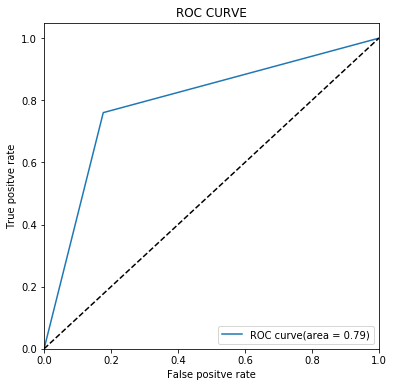

(array([0.        , 0.17678515, 1.        ]),
 array([0.       , 0.7603252, 1.       ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,boost_lr_y_pred)

# Boosted Decision Tree

In [0]:
boost_DT= AdaBoostClassifier(base_estimator=DT,random_state=0,n_estimators=1)  
boost_DT.fit(X_train, y_train)

boost_DT_y_pred = boost_DT.predict(X_test) 
boost_DT_test_accuracy=metrics.accuracy_score(y_test,boost_DT_y_pred)
boost_DT_train_accuracy=boost_lr.score(X_train, y_train)
boost_DT_test_precision = metrics.precision_score(y_test,boost_DT_y_pred)

print("Test Accuracy for Bagged DT model:\n",boost_DT_test_accuracy)
print()
print("Training Accuracy for Bagged DT model model:\n",boost_DT_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,boost_DT_y_pred))
print()
print("\nPrecision Score:\n\n",boost_DT_test_precision) 


Test Accuracy for Bagged DT model:
 0.9019827310521267

Training Accuracy for Bagged DT model model:
 0.7915010281014393

Confusion Matirx:

 [[2834  345]
 [ 268 2807]]


Precision Score:

 0.8905456852791879


In [0]:
Report_boost_DT=metrics.classification_report(y_test,boost_DT_y_pred)
print(Report_boost_DT)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3179
           1       0.89      0.91      0.90      3075

    accuracy                           0.90      6254
   macro avg       0.90      0.90      0.90      6254
weighted avg       0.90      0.90      0.90      6254



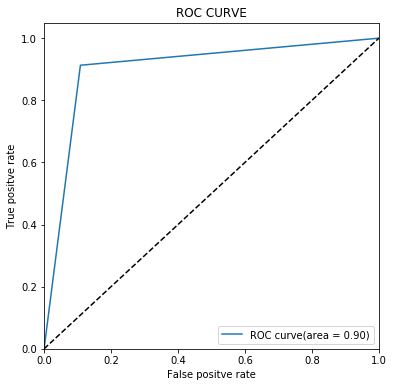

(array([0.        , 0.10852469, 1.        ]),
 array([0.        , 0.91284553, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,boost_DT_y_pred)

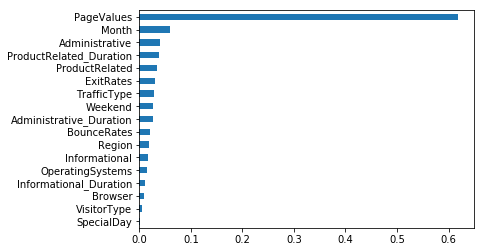

In [0]:
(pd.Series(boost_DT.feature_importances_, index=X.columns).sort_values().plot(kind='barh'))
plt.show()

In [0]:
all_models=['lr','DT','rfc','lgbm','bag_lr','bag_DT','boost_lr','boost_DT']

In [0]:
models_err=pd.DataFrame({'Var':np.NaN,'Bias':np.NaN},index=all_models)

In [0]:
for model,names in zip([lr,DT,rfc,lgbm,bag_lr,bag_DT,boost_lr,boost_DT],all_models):
    accuracy = []
    model.fit(X_sm,y_sm)
    y_predict = model.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_predict)
    accuracy.append(round(acc*100,2))
    print("Accuracy:" ,accuracy,names)

Accuracy: [83.91] lr
Accuracy: [100.0] DT
Accuracy: [99.66] rfc
Accuracy: [96.02] lgbm
Accuracy: [83.66] bag_lr
Accuracy: [100.0] bag_DT
Accuracy: [79.34] boost_lr
Accuracy: [100.0] boost_DT


In [0]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [0]:
X_sm=pd.DataFrame(X_sm,columns=X.columns)
y_sm=pd.DataFrame(y_sm)

In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model, name in zip([lr,DT,rfc,lgbm,bag_lr,bag_DT,boost_lr,boost_DT], 
      ['lr','DT','rfc','lgbm','bag_lr','bag_DT','boost_lr','boost_DT']):
    roc_auc=[]
    for train,test in kf.split(X_sm,y_sm):
        Xtrain,Xtest=X_sm.iloc[train,:],X_sm.iloc[test,:]
        Ytrain,Ytest=y_sm.iloc[train],y_sm.iloc[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        fpr,tpr, _ = roc_curve(Ytest,Y_predict)
        roc_auc.append(auc(fpr, tpr))
    print("AUC scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(roc_auc),
                                    np.var(roc_auc,ddof=1), name ))   

AUC scores: 0.84 (+/- 0.00004) [lr]
AUC scores: 0.90 (+/- 0.00001) [DT]
AUC scores: 0.93 (+/- 0.00001) [rfc]
AUC scores: 0.94 (+/- 0.00001) [lgbm]
AUC scores: 0.84 (+/- 0.00003) [bag_lr]
AUC scores: 0.94 (+/- 0.00002) [bag_DT]
AUC scores: 0.79 (+/- 0.00003) [boost_lr]
AUC scores: 0.90 (+/- 0.00001) [boost_DT]


### Applying 3 type of Feature Selection on Light Gradient Boosting Method ( To determine which perform better)

In [0]:
X.head()

Administrative  Administrative_Duration  ...  VisitorType  Weekend
0       -0.696993                -0.457191  ...            2        0
1       -0.696993                -0.457191  ...            2        0
2       -0.696993                -0.457191  ...            2        0
3       -0.696993                -0.457191  ...            2        0
4       -0.696993                -0.457191  ...            2        1

[5 rows x 17 columns]

# Correlation attribute feature selection

In [0]:
cr_x=X.drop(columns=['Browser','OperatingSystems','Region','TrafficType'])

smt = SMOTE()
cr_x_sm, cr_y_sm = smt.fit_sample(cr_x,y)
np.bincount(cr_y_sm)

array([10422, 10422])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(cr_x_sm,cr_y_sm,train_size=0.7,random_state=100)

In [0]:
lgbm= LGBMClassifier(random_state=0,n_estimators=750,max_depth=30,objective='binary')
lgbm.fit(X_train, y_train)

lgbm_y_pred = lgbm.predict(X_test) 
lgbm_test_accuracy=metrics.accuracy_score(y_test,lgbm_y_pred)
lgbm_train_accuracy=lgbm.score(X_train, y_train)
lgbm_test_precision = metrics.precision_score(y_test,lgbm_y_pred)

print("Test Accuracy for Light Gradient boosting model:\n",lgbm_test_accuracy)
print()
print("Training Accuracy forLight Gradient boosting model:\n",lgbm_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,lgbm_y_pred))
print()
print("\nPrecision Score:\n\n",lgbm_test_precision)

Test Accuracy for Light Gradient boosting model:
 0.9330028781579789

Training Accuracy forLight Gradient boosting model:
 0.9998629198080877

Confusion Matirx:

 [[2942  237]
 [ 182 2893]]


Precision Score:

 0.9242811501597444


In [0]:
Report_lgbm=metrics.classification_report(y_test,lgbm_y_pred)
print(Report_lgbm)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3179
           1       0.92      0.94      0.93      3075

    accuracy                           0.93      6254
   macro avg       0.93      0.93      0.93      6254
weighted avg       0.93      0.93      0.93      6254



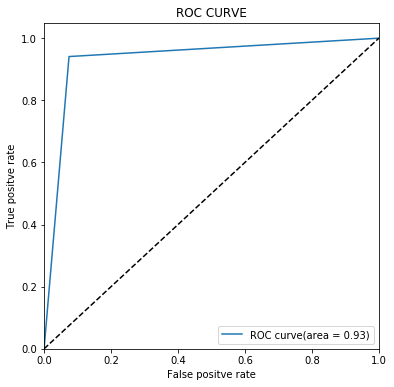

(array([0.        , 0.07455175, 1.        ]),
 array([0.        , 0.94081301, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,lgbm_y_pred)

# Information gain feature selection

In [0]:
ig_x=X.drop(columns=['VisitorType','Informational_Duration','SpecialDay','Weekend','Informational','OperatingSystems','Browser','Region'])

smt = SMOTE()
ig_x_sm, ig_y_sm = smt.fit_sample(ig_x,y)
np.bincount(ig_y_sm)

array([10422, 10422])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(ig_x_sm,ig_y_sm,train_size=0.7,random_state=100)

In [0]:
lgbm= LGBMClassifier(random_state=0,n_estimators=750,max_depth=30,objective='binary')
lgbm.fit(X_train, y_train)

lgbm_y_pred = lgbm.predict(X_test) 
lgbm_test_accuracy=metrics.accuracy_score(y_test,lgbm_y_pred)
lgbm_train_accuracy=lgbm.score(X_train, y_train)
lgbm_test_precision = metrics.precision_score(y_test,lgbm_y_pred)

print("Test Accuracy for Light Gradient boosting model:\n",lgbm_test_accuracy)
print()
print("Training Accuracy forLight Gradient boosting model:\n",lgbm_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,lgbm_y_pred))
print()
print("\nPrecision Score:\n\n",lgbm_test_precision)

Test Accuracy for Light Gradient boosting model:
 0.9290054365206268

Training Accuracy forLight Gradient boosting model:
 0.9999314599040439

Confusion Matirx:

 [[2915  264]
 [ 180 2895]]


Precision Score:

 0.9164292497625831


In [0]:
Report_lgbm=metrics.classification_report(y_test,lgbm_y_pred)
print(Report_lgbm)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3179
           1       0.92      0.94      0.93      3075

    accuracy                           0.93      6254
   macro avg       0.93      0.93      0.93      6254
weighted avg       0.93      0.93      0.93      6254



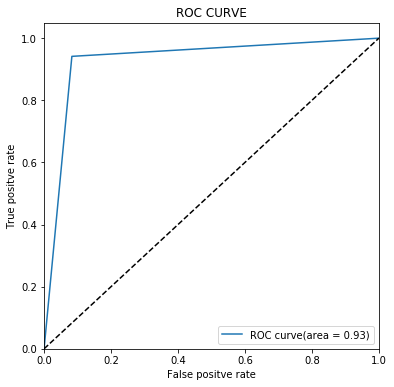

(array([0.        , 0.08304498, 1.        ]),
 array([0.        , 0.94146341, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,lgbm_y_pred)

# Minimum Redundancy Maximum Relevance Filter ( Feature Selection )

In [0]:
mrmr_x=X.drop(columns=['BounceRates','TrafficType','OperatingSystems','Administrative'])

smt = SMOTE()
mrmr_x_sm, mrmr_y_sm = smt.fit_sample(mrmr_x,y)
np.bincount(mrmr_y_sm)

array([10422, 10422])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(mrmr_x_sm,mrmr_y_sm,train_size=0.7,random_state=100)

In [0]:
lgbm= LGBMClassifier(random_state=0,n_estimators=750,max_depth=30,objective='binary')
lgbm.fit(X_train, y_train)

lgbm_y_pred = lgbm.predict(X_test) 
lgbm_test_accuracy=metrics.accuracy_score(y_test,lgbm_y_pred)
lgbm_train_accuracy=lgbm.score(X_train, y_train)
lgbm_test_precision = metrics.precision_score(y_test,lgbm_y_pred)

print("Test Accuracy for Light Gradient boosting model:\n",lgbm_test_accuracy)
print()
print("Training Accuracy forLight Gradient boosting model:\n",lgbm_train_accuracy)
print("\nConfusion Matirx:\n\n",metrics.confusion_matrix(y_test,lgbm_y_pred))
print()
print("\nPrecision Score:\n\n",lgbm_test_precision)

Test Accuracy for Light Gradient boosting model:
 0.9346018548129197

Training Accuracy forLight Gradient boosting model:
 0.9998629198080877

Confusion Matirx:

 [[2952  227]
 [ 182 2893]]


Precision Score:

 0.9272435897435898


In [0]:
Report_lgbm=metrics.classification_report(y_test,lgbm_y_pred)
print(Report_lgbm)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3179
           1       0.93      0.94      0.93      3075

    accuracy                           0.93      6254
   macro avg       0.93      0.93      0.93      6254
weighted avg       0.93      0.93      0.93      6254



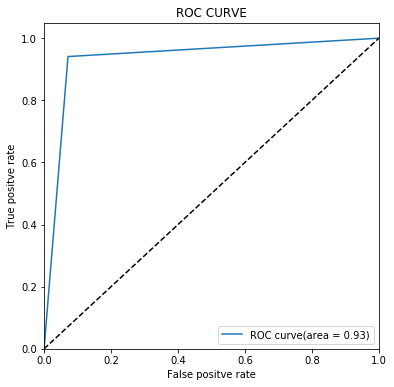

(array([0.       , 0.0714061, 1.       ]),
 array([0.        , 0.94081301, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_test,lgbm_y_pred)